<a href="https://colab.research.google.com/github/ahmedsiam0/fraud-detection/blob/main/fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Libraries**

In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [134]:
df=pd.read_csv("/content/fraudTrain.csv")


# **Take a Look**

In [135]:
df.head(10)

,ID,Time,Card Number,merchant,category,Amount,firstName,lastName,trans_num,is_fraud
0,0,1/1/2019 0:00,2.700000e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,0b242abb623afc578575680df30655b9,0.0
1,1,1/1/2019 0:00,6.300000e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,1f76529f8574734946361c461b024d99,0.0
2,2,1/1/2019 0:00,3.890000e+13,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,a1a22d70485983eac12b5b88dad1cf95,0.0
3,3,1/1/2019 0:01,3.530000e+15,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,6b849c168bdad6f867558c3793159a81,0.0
4,4,1/1/2019 0:03,3.760000e+14,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,a41d7549acf90789359a9aa5346dcb46,0.0
5,5,1/1/2019 0:04,4.770000e+15,"fraud_Stroman, Hudson and Erdman",gas_transport,94.63,Jennifer,Conner,189a841a0a8ba03058526bcfe566aab5,0.0
6,6,1/1/2019 0:04,3.010000e+13,fraud_Rowe-Vandervort,grocery_net,44.54,Kelsey,Richards,83ec1cc84142af6e2acf10c44949e720,0.0
7,7,1/1/2019 0:05,6.010000e+15,fraud_Corwin-Collins,gas_transport,71.65,Steven,Williams,6d294ed2cc447d2c71c7171a3d54967c,0.0
8,8,1/1/2019 0:05,4.920000e+15,fraud_Herzog Ltd,misc_pos,4.27,Heather,Chase,fc28024ce480f8ef21a32d64c93a29f5,0.0
9,9,1/1/2019 0:06,2.720000e+15,"fraud_Schoen, Kuphal and Nitzsche",grocery_pos,198.39,Melissa,Aguilar,3b9014ea8fb80bd65de0b1463b00b00e,0.0


In [136]:
df.tail(10)

,ID,Time,Card Number,merchant,category,Amount,firstName,lastName,trans_num,is_fraud
1002094,1002094,2/15/2020 16:37,2.130000e+14,"fraud_Ritchie, Oberbrunner and Cremin",travel,5.09,Thomas,Sullivan,578dc7bc39ff5f0af9ec1bc6d4ffd51c,0.0
1002095,1002095,2/15/2020 16:38,4.630000e+15,fraud_Morissette PLC,shopping_pos,7.12,Karen,Warren,dd5494ce24810834654b2086a38c9d90,0.0
1002096,1002096,2/15/2020 16:39,3.560000e+15,fraud_Stamm-Witting,shopping_net,9.42,Jose,Vasquez,b03c2431ba6f6c03a25f35a4375e7fc2,0.0
1002097,1002097,2/15/2020 16:39,4.020000e+18,"fraud_Hettinger, McCullough and Fay",home,68.84,Katherine,Love,e34e4d700dcf1a0c5d134b34c21517e7,0.0
1002098,1002098,2/15/2020 16:40,3.060000e+13,fraud_Bins-Howell,personal_care,97.57,Morgan,Smith,7681f459e3410bfc32d5480b53adb1ad,0.0
1002099,1002099,2/15/2020 16:40,3.020000e+13,fraud_Thiel Ltd,travel,2.87,Kenneth,Doyle,dcf7de10c9699f0c11cb8dfd7a8e8f65,0.0
1002100,1002100,2/15/2020 16:40,3.460000e+14,fraud_Botsford Ltd,shopping_pos,9.09,Donna,Moreno,fa5abf4fdda69146f9c66067e9e163a2,0.0
1002101,1002101,2/15/2020 16:42,3.810000e+13,fraud_Mayert Group,shopping_pos,10.00,Marissa,Clark,cf86f1a0a541182c0078b1dc81082136,0.0
1002102,1002102,2/15/2020 16:42,3.450000e+14,fraud_Wuckert-Goldner,home,6.66,Brian,Perez,bb7c2ae90d756beb2414637aa69cbeed,0.0
1002103,1002103,2/15/2020 16:43,2.270000e+15,fraud_Brown Inc,kids_,NaN,NaN,NaN,NaN,NaN


In [137]:
df.describe()

,ID,Card Number,Amount,is_fraud
count,1.002104e+06,1.002104e+06,1.002103e+06,1.002103e+06
mean,5.010515e+05,4.171374e+17,7.025616e+01,5.701011e-03
std,2.892827e+05,1.308840e+18,1.602039e+02,7.528954e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,0.000000e+00
25%,2.505258e+05,1.800000e+14,9.640000e+00,0.000000e+00
50%,5.010515e+05,3.520000e+15,4.742000e+01,0.000000e+00
75%,7.515772e+05,4.640000e+15,8.304000e+01,0.000000e+00
max,1.002103e+06,4.990000e+18,2.894890e+04,1.000000e+00


# **Data Preprocessing**

## **Handling missing values**

In [138]:
print (df.isnull().sum())

ID             0
Time           0
Card Number    0
merchant       0
category       0
Amount         1
firstName      1
lastName       1
trans_num      1
is_fraud       1
dtype: int64


In [139]:
#find null in Amount col and replace it with mean
df['Amount'].fillna(df['Amount'].mean(), inplace=True)

In [140]:
#drop row if first name /last name/trans_num is null 'Not important'

df = df.dropna(subset=['firstName', 'lastName', 'trans_num', 'is_fraud'])


In [141]:
print (df.isnull().sum())

ID             0
Time           0
Card Number    0
merchant       0
category       0
Amount         0
firstName      0
lastName       0
trans_num      0
is_fraud       0
dtype: int64


## **Handling Duplicates**

In [142]:
sum(df.duplicated()) #no duplicate to handle it

0

## **Handling Wrong Format**

In [143]:
type(df['Time'].iloc[0])

str

In [144]:
df['Time']=pd.to_datetime(df['Time'])

In [145]:
type(df['Time'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [146]:
print(df['Time'])

0         2019-01-01 00:00:00
1         2019-01-01 00:00:00
2         2019-01-01 00:00:00
3         2019-01-01 00:01:00
4         2019-01-01 00:03:00
                  ...        
1002098   2020-02-15 16:40:00
1002099   2020-02-15 16:40:00
1002100   2020-02-15 16:40:00
1002101   2020-02-15 16:42:00
1002102   2020-02-15 16:42:00
Name: Time, Length: 1002103, dtype: datetime64[ns]


In [147]:
df.sort_values(by='Time', inplace=True)

df['month'] = df['Time'].dt.month
df['year'] = df['Time'].dt.year
df['Hours'] = df['Time'].dt.hour
df['Minutes'] = df['Time'].dt.minute
df.drop('Time',axis=1,inplace=True)


In [148]:
df['month'] = df['month'].astype('int64')
df['year'] = df['year'].astype('int64')

## converting categorical data to nums

In [149]:
df.head()

,ID,Card Number,merchant,category,Amount,firstName,lastName,trans_num,is_fraud,month,year,Hours,Minutes
0,0,2.700000e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,0b242abb623afc578575680df30655b9,0.0,1,2019,0,0
1,1,6.300000e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,1f76529f8574734946361c461b024d99,0.0,1,2019,0,0
2,2,3.890000e+13,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,a1a22d70485983eac12b5b88dad1cf95,0.0,1,2019,0,0
3,3,3.530000e+15,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,6b849c168bdad6f867558c3793159a81,0.0,1,2019,0,1
4,4,3.760000e+14,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,a41d7549acf90789359a9aa5346dcb46,0.0,1,2019,0,3


In [150]:
df = df.drop(columns=['firstName', 'lastName', 'ID'])

In [151]:
le = LabelEncoder()

df['category'] = le.fit_transform(df['category'])
df['merchant'] = le.fit_transform(df['merchant'])
df['trans_num'] = le.fit_transform(df['trans_num'])

In [152]:
df.dtypes

Card Number    float64
merchant         int64
category         int64
Amount         float64
trans_num        int64
is_fraud       float64
month            int64
year             int64
Hours            int32
Minutes          int32
dtype: object

In [153]:
df.head()

,Card Number,merchant,category,Amount,trans_num,is_fraud,month,year,Hours,Minutes
0,2.700000e+15,514,8,4.97,43723,0.0,1,2019,0,0
1,6.300000e+11,241,4,107.23,123180,0.0,1,2019,0,0
2,3.890000e+13,390,0,220.11,632681,0.0,1,2019,0,0
3,3.530000e+15,360,2,45.00,420764,0.0,1,2019,0,1
4,3.760000e+14,297,9,41.96,642198,0.0,1,2019,0,3


In [154]:
df["trans_num"].value_counts()

trans_num
43723     1
826656    1
132835    1
868328    1
29798     1
         ..
813234    1
636541    1
875016    1
362810    1
733909    1
Name: count, Length: 1002103, dtype: int64

##Feature Scaling "Standardization "

In [155]:
# Standardize the features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Convert the NumPy array to a Pandas DataFrame
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)


##Graph

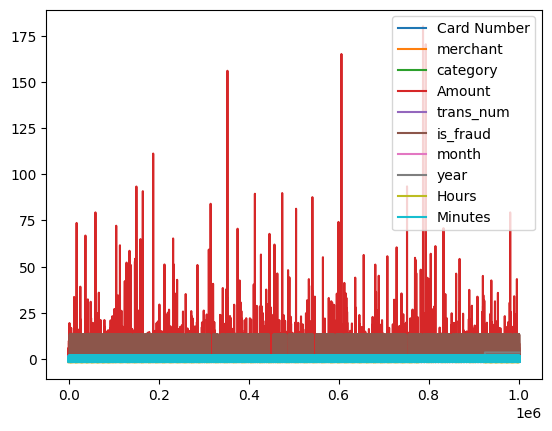

In [156]:
import matplotlib.pyplot as plt
df_scaled.plot()
plt.show()


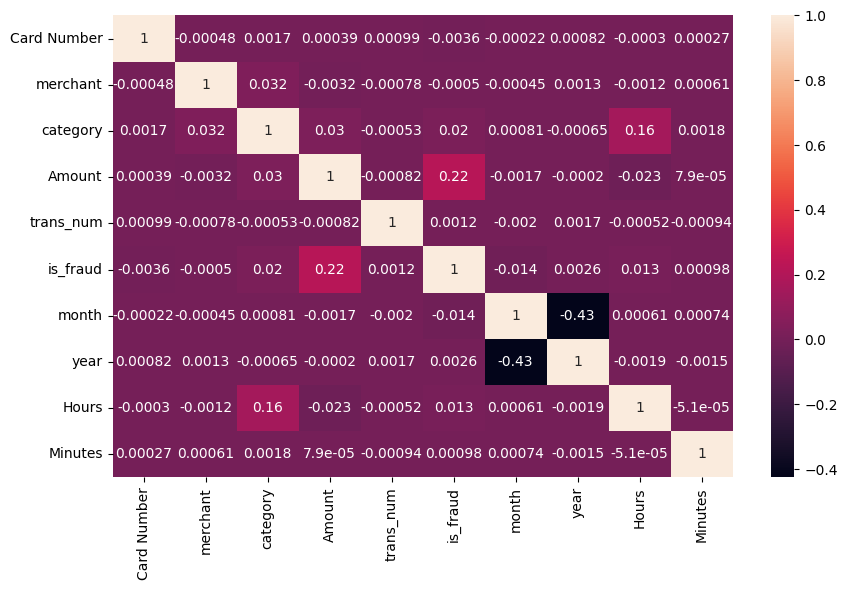

In [157]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_scaled.corr(), annot=True)
plt.show()

In [158]:
# Boxplot for each numerical column
#df_scaled.plot(kind='box')
#plt.show()

# Scatter plot for each pair of numerical columns
#sns.pairplot(df_scaled)
#plt.show()

#**Feature Engineering**

In [159]:
# Create new features from existing ones that might be more informative for fraud detection
#(e.g.,difference between current and average transaction amount, time difference between previous transactions).


In [160]:
# Difference between current and average transaction amount for each user
#"The difference between the amount of this transaction and the average transactions amount this person"
df['current/avg_Trans_amount_diff'] = df['Amount'] - df.groupby('Card Number')['Amount'].transform('mean')

In [161]:
df.tail(1000)

,Card Number,merchant,category,Amount,trans_num,is_fraud,month,year,Hours,Minutes,current/avg_Trans_amount_diff
1001103,3.540000e+15,324,3,61.23,497786,0.0,2,2020,4,26,-12.109107
1001104,4.780000e+12,149,8,123.03,259845,0.0,2,2020,4,27,65.403281
1001105,2.250000e+15,99,2,59.39,427805,0.0,2,2020,4,28,-12.774787
1001106,3.760000e+14,110,9,8.62,582073,0.0,2,2020,4,32,-64.228363
1001107,4.410000e+15,474,2,36.96,891102,0.0,2,2020,4,32,-33.664103
...,...,...,...,...,...,...,...,...,...,...,...
1002099,3.020000e+13,617,13,2.87,864817,0.0,2,2020,16,40,-64.581409
1002098,3.060000e+13,54,10,97.57,463644,0.0,2,2020,16,40,31.424844
1002100,3.460000e+14,67,12,9.09,979952,0.0,2,2020,16,40,-61.567652
1002101,3.810000e+13,409,12,10.00,812093,0.0,2,2020,16,42,-42.101134


In [162]:
# Time difference between previous transactions مش مظبوطة الفكرة
#df['time_diff_prev_trans'] = dfBeforeCategoricalConverting.groupby('Card Number')['Time'].diff()

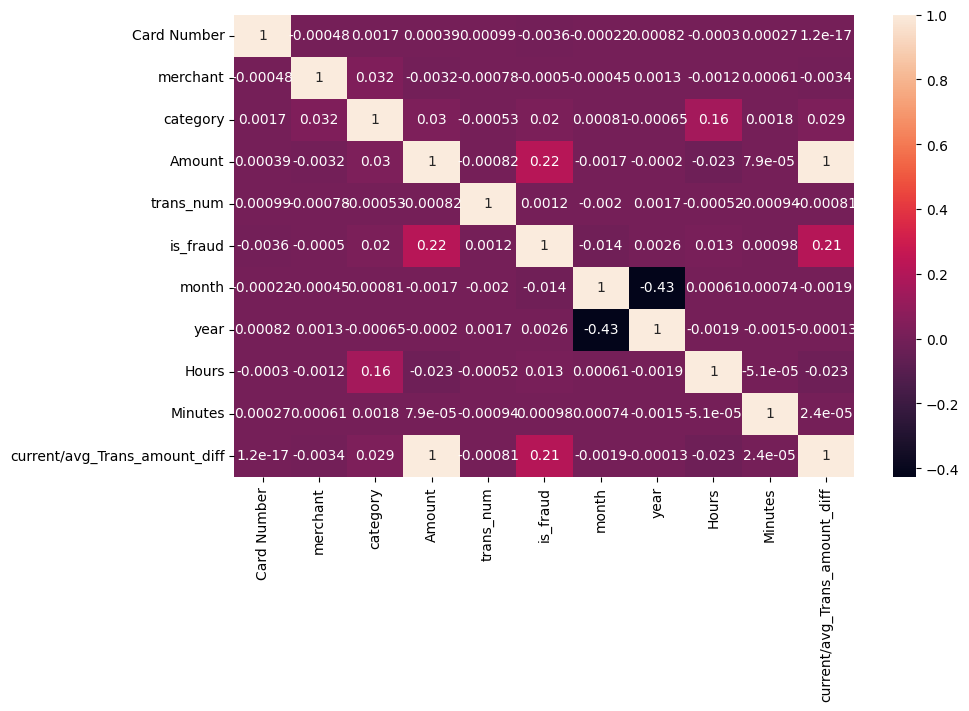

In [163]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True)
plt.show()